# **Phish in the Web**
### **Feature Importance**

**Data Preprocessing**

In [1]:
#import libraries only ONCE
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #no one hot // all columns numeric
from sklearn.model_selection import train_test_split #data splitting


#read in data & check for shape
phish_df = pd.read_csv("Phishing_Legitimate_full.csv")
phish_df.shape

#specifying the columns we want to keep
selected_columns = ['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
    'NumDashInHostname', 'AtSymbol','TildeSymbol', 'NumUnderscore','NumPercent',
    'NumQueryComponents','NumAmpersand','NumHash','NumNumericChars','NoHttps',
    'RandomString','IpAddress','DomainInSubdomains','DomainInPaths','HttpsInHostname','HostnameLength',
    'PathLength','QueryLength','DoubleSlashInPath','NumSensitiveWords','EmbeddedBrandName',
    'PctExtHyperlinks','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction',
    'ExtFormAction','AbnormalFormAction','PctNullSelfRedirectHyperlinks','FrequentDomainNameMismatch',
    'FakeLinkInStatusBar','RightClickDisabled','PopUpWindow','SubmitInfoToEmail','IframeOrFrame',
    'MissingTitle','ImagesOnlyInForm','SubdomainLevelRT','UrlLengthRT','PctExtResourceUrlsRT',
    'AbnormalExtFormActionR','ExtMetaScriptLinkRT','PctExtNullSelfRedirectHyperlinksRT', 'CLASS_LABEL']

#features
feature_columns = ['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol','TildeSymbol', 'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','NumNumericChars','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','HttpsInHostname','HostnameLength','PathLength','QueryLength','DoubleSlashInPath','NumSensitiveWords','EmbeddedBrandName','PctExtHyperlinks','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction', 'ExtFormAction','AbnormalFormAction','PctNullSelfRedirectHyperlinks','FrequentDomainNameMismatch','FakeLinkInStatusBar','RightClickDisabled','PopUpWindow','SubmitInfoToEmail','IframeOrFrame','MissingTitle','ImagesOnlyInForm','SubdomainLevelRT','UrlLengthRT','PctExtResourceUrlsRT','AbnormalExtFormActionR','ExtMetaScriptLinkRT','PctExtNullSelfRedirectHyperlinksRT']
    #without class label

#label
label_columns = ['CLASS_LABEL']

phishing_features_df = phish_df[feature_columns]
phishing_label_df = phish_df[label_columns]

phishing_features_df.head()

#initiate scaler
min_scaler = MinMaxScaler()

#scale features // this includes id (maybe drop later)
phishing_features_df[feature_columns] = min_scaler.fit_transform(phishing_features_df[feature_columns])

phishing_features_df.head()

#data splitting

#split data!
x_train, x_test, y_train, y_test = train_test_split(phishing_features_df, phishing_label_df, test_size=0.2, random_state=42)

#print training data shape and label's shape
print (f"Training: Features' shape [no. of examples * feature vector size] =  {x_train.shape}")
print (f"Training: Label's shape [no. of examples * 1] = {y_train.shape}\n")

#print test data shape and label's shape
print (f"Test: Features' shape [no. of examples * feature vector size] =  {x_test.shape}")
print (f"Test: Label's shape [no. of examples * 1] = {y_test.shape}\n")

Training: Features' shape [no. of examples * feature vector size] =  (8000, 48)
Training: Label's shape [no. of examples * 1] = (8000, 1)

Test: Features' shape [no. of examples * feature vector size] =  (2000, 48)
Test: Label's shape [no. of examples * 1] = (2000, 1)



<ipython-input-1-bad53a89a23a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_features_df[feature_columns] = min_scaler.fit_transform(phishing_features_df[feature_columns])


**training models**

all models, will choose later on

In [2]:
#import necessary files
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix

#testing all models

#SVM
svm_model = SVC(kernel="linear")
svm_model.fit(x_train, y_train.values.ravel())  #ravel() to convert y_train to 1d array
svm_predictions = svm_model.predict(x_test)

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train.values.ravel())
rf_predictions = rf_model.predict(x_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

#MLP (Multi-Layer Perceptron)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(x_train, y_train.values.ravel())
mlp_predictions = mlp_model.predict(x_test)

print("\nMLP Classification Report:")
print(classification_report(y_test, mlp_predictions))

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(x_train, y_train.values.ravel())
logistic_predictions = logistic_model.predict(x_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

# Function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred):
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# SVM Evaluation Metrics
print("\nSVM Evaluation Metrics:")
print_evaluation_metrics(y_test, svm_predictions)

# Random Forest Evaluation Metrics
print("\nRandom Forest Evaluation Metrics:")
print_evaluation_metrics(y_test, rf_predictions)

# MLP Evaluation Metrics
print("\nMLP Evaluation Metrics:")
print_evaluation_metrics(y_test, mlp_predictions)

# Logistic Regression Evaluation Metrics
print("\nLogistic Regression Evaluation Metrics:")
print_evaluation_metrics(y_test, logistic_predictions)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       988
           1       0.93      0.95      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98  

### **Ablation for MLP**

**import necessary files**

In [3]:
import warnings
import numpy as np
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Suppress data conversion warnings
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Suppress convergence warnings for MLPClassifier
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define MLP model with adjusted max_iter parameter
mlp_model = MLPClassifier(max_iter=1000)

# Train the MLP model
mlp_model.fit(x_train, y_train)

# Predict using the trained model
y_pred_mlp = mlp_model.predict(x_test)

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_perc_mlp = accuracy_mlp * 100

# Print test accuracy
print(f"MLP test accuracy = {accuracy_perc_mlp:.2f}%")

MLP test accuracy = 97.75%


In [5]:
# Get feature names
feature_columns = x_train.columns

# Dictionary to store accuracies
accuracy_dict_mlp = {'no ablation': accuracy_score(y_test, y_pred_mlp)}

# Iterate through features
for features_col in feature_columns:

    # Print feature being removed
    print(f"Removing feature {features_col}")

    # Create ablated feature set
    if features_col == 'Class Name':
        x_ablated_train = x_train.iloc[:, :3].join(x_train.iloc[:, 22 + 1:])
        x_ablated_test = x_test.iloc[:, :3].join(x_test.iloc[:, 22 + 1:])
    elif features_col == 'Review Text':
        x_ablated_train = x_train.iloc[:, :23]
        x_ablated_test = x_test.iloc[:, :23]
    else:
        x_ablated_train = x_train.drop(columns=[features_col])
        x_ablated_test = x_test.drop(columns=[features_col])

    # Build and train the MLP model
    mlp_model = MLPClassifier(max_iter=1000)
    mlp_model.fit(x_ablated_train, y_train)

    # Predict
    y_pred_mlp_ablated = mlp_model.predict(x_ablated_test)

    # Calculate test accuracy
    accuracy = accuracy_score(y_test, y_pred_mlp_ablated)
    accuracy_dict_mlp[features_col] = accuracy

    # Print test accuracy
    print(f"MLP Testing accuracy: {accuracy * 100:.2f}%\n")

# Sort the accuracies dictionary based on values
sorted_accuracies = sorted(accuracy_dict_mlp.items(), key=lambda x: x[1], reverse=True)

# Print all features
print("\nAll Features after Ablation:")
for idx, (feature, accuracy) in enumerate(sorted_accuracies):
    print(f"{idx+1}. {feature}: {accuracy * 100:.2f}%")


Removing feature NumDots
MLP Testing accuracy: 97.70%

Removing feature SubdomainLevel
MLP Testing accuracy: 97.80%

Removing feature PathLevel
MLP Testing accuracy: 98.00%

Removing feature UrlLength
MLP Testing accuracy: 98.05%

Removing feature NumDash
MLP Testing accuracy: 98.05%

Removing feature NumDashInHostname
MLP Testing accuracy: 98.05%

Removing feature AtSymbol
MLP Testing accuracy: 97.85%

Removing feature TildeSymbol
MLP Testing accuracy: 98.00%

Removing feature NumUnderscore
MLP Testing accuracy: 97.80%

Removing feature NumPercent
MLP Testing accuracy: 97.45%

Removing feature NumQueryComponents
MLP Testing accuracy: 97.80%

Removing feature NumAmpersand
MLP Testing accuracy: 97.85%

Removing feature NumHash
MLP Testing accuracy: 98.10%

Removing feature NumNumericChars
MLP Testing accuracy: 97.75%

Removing feature NoHttps
MLP Testing accuracy: 97.65%

Removing feature RandomString
MLP Testing accuracy: 98.10%

Removing feature IpAddress
MLP Testing accuracy: 97.75%


### **plot ablation results for mlp**

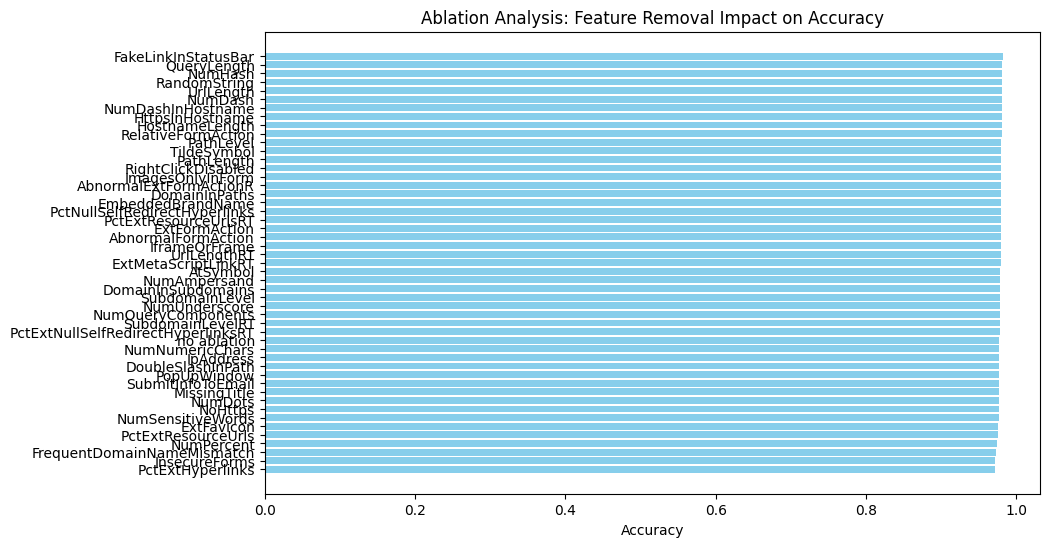

In [7]:
import matplotlib.pyplot as plt

# Extract features and accuracies for plotting
features = [item[0] for item in sorted_accuracies]
accuracies = [item[1] for item in sorted_accuracies]

# Plot results
plt.figure(figsize=(10, 6))
plt.barh(features, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Ablation Analysis: Feature Removal Impact on Accuracy')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top
plt.show()

### **Feature Importance for Random Forest**

In [6]:
#random forest feature ranking
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a list of tuples containing feature names and their importances
feature_importance_list = list(zip(feature_columns, feature_importances))

# Sort the feature importance list based on importance (from most to least important)
sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

# Print the feature importance in descending order
print("Feature Importance for Random Forest Model:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

Feature Importance for Random Forest Model:
PctExtNullSelfRedirectHyperlinksRT: 0.1993
PctExtHyperlinks: 0.1895
PctExtResourceUrls: 0.0846
FrequentDomainNameMismatch: 0.0717
PctNullSelfRedirectHyperlinks: 0.0561
NumDash: 0.0425
ExtMetaScriptLinkRT: 0.0362
InsecureForms: 0.0318
NumNumericChars: 0.0303
PathLevel: 0.0265
NumDots: 0.0235
SubmitInfoToEmail: 0.0207
NumQueryComponents: 0.0176
PathLength: 0.0175
UrlLength: 0.0170
NumSensitiveWords: 0.0159
QueryLength: 0.0132
HostnameLength: 0.0122
IframeOrFrame: 0.0117
ExtFavicon: 0.0111
NumUnderscore: 0.0065
PctExtResourceUrlsRT: 0.0064
NumDashInHostname: 0.0058
NumAmpersand: 0.0055
SubdomainLevel: 0.0052
AbnormalExtFormActionR: 0.0048
RelativeFormAction: 0.0046
UrlLengthRT: 0.0037
RandomString: 0.0034
MissingTitle: 0.0030
DomainInPaths: 0.0028
EmbeddedBrandName: 0.0024
ExtFormAction: 0.0023
IpAddress: 0.0023
NumPercent: 0.0021
NoHttps: 0.0019
DomainInSubdomains: 0.0018
SubdomainLevelRT: 0.0015
AbnormalFormAction: 0.0013
RightClickDisabled: 0